In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Washburn inspired data

1. gamma: the tea surface tension, in N m−1
2. phi: the contact angle between the biscuit and the tea surface, in rad.
3. eta: the tea dynamic viscosity, in Pa s
4. L: the distance up the biscuit that the tea was visible, in m.
5. t: the time after initial dunking that the measurement was made, in s.
6. biscuit: the type of biscuit that was dunked, which is Rich Tea, Hobnob or Digestive.


L = sqrt(gamma . r . t .cos(phi)/2,eta)

In [60]:
# Load the data
big_df = pd.read_csv('dunking-data.csv')
big_df.head()

,gamma,phi,eta,L,t,biscuit
0,0.073897,1.333006,0.000999,0.011196,19.362214,Digestive
1,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive
2,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive
3,0.070793,1.502001,0.001002,0.003774,16.292780,Hobnob
4,0.058917,1.548274,0.001004,0.002291,13.662271,Hobnob


In [61]:
big_df['biscuit'].value_counts()

biscuit
Digestive    1000
Hobnob       1000
Rich Tea     1000
Name: count, dtype: int64

In [62]:
micro_df = pd.read_csv('microscopy-data.csv')
micro_df.head()

,gamma,phi,eta,L,t,r
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07


In [63]:
big_df.describe()

,gamma,phi,eta,L,t
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.073240,1.443311,0.001001,0.006243,19.848705
std,0.009956,0.094904,0.000010,0.003184,5.809489
min,0.040328,1.016252,0.000963,0.000185,10.013910
25%,0.066587,1.388532,0.000994,0.003957,14.675764
50%,0.073153,1.463111,0.001001,0.005789,19.859176
75%,0.079855,1.517507,0.001007,0.008076,24.776134
max,0.104563,1.570619,0.001035,0.019230,29.991969


In [64]:
micro_df.describe()

,gamma,phi,eta,L,t,r
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,0.073197,1.448925,0.001000,0.006070,19.757165,5.344857e-07
std,0.009956,0.095581,0.000010,0.003180,5.803528,2.163520e-07
min,0.043428,1.072712,0.000971,0.000483,10.013910,1.562959e-07
25%,0.066741,1.404303,0.000993,0.003843,14.844579,3.278206e-07
50%,0.073391,1.471977,0.001001,0.005550,19.846801,4.938002e-07
75%,0.079266,1.520274,0.001007,0.007904,24.767974,7.572568e-07
max,0.103439,1.570269,0.001034,0.019009,29.934807,8.991764e-07


In [65]:
big_df[big_df['L' ] < micro_df['L'].min()]

,gamma,phi,eta,L,t,biscuit
520,0.086479,1.570446,0.001011,0.000385,13.380665,Digestive
998,0.065648,1.570619,0.000997,0.000185,10.931844,Hobnob
1057,0.073687,1.570408,0.001017,0.000474,18.285308,Digestive
1301,0.071065,1.570593,0.000998,0.000329,18.708226,Digestive
1630,0.072185,1.569050,0.001013,0.000478,13.198838,Rich Tea
2299,0.070735,1.570112,0.001004,0.000392,24.490845,Rich Tea


Row Number 998, has a weird L value it's not really within the range

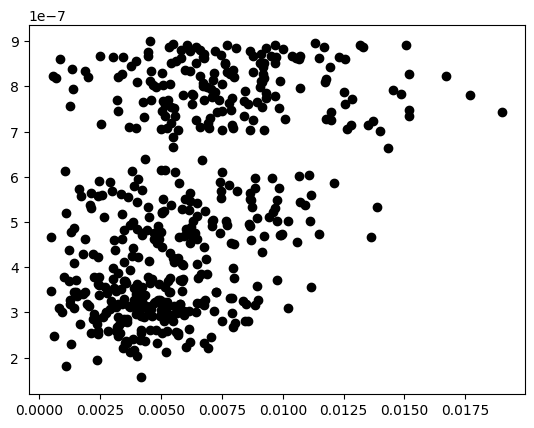

In [66]:
plt.scatter(x = micro_df['L'], y = micro_df['r'], color='black')

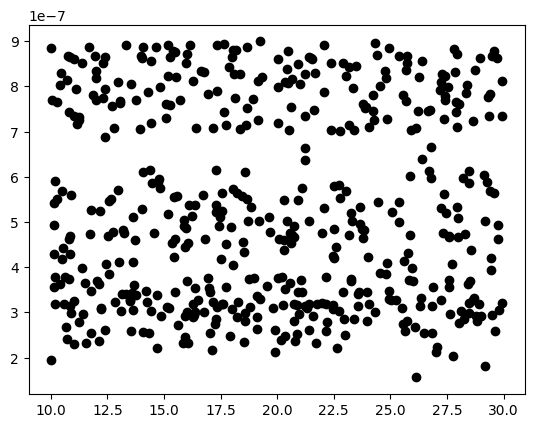

In [67]:
plt.scatter(x = micro_df['t'], y = micro_df['r'], color='black')

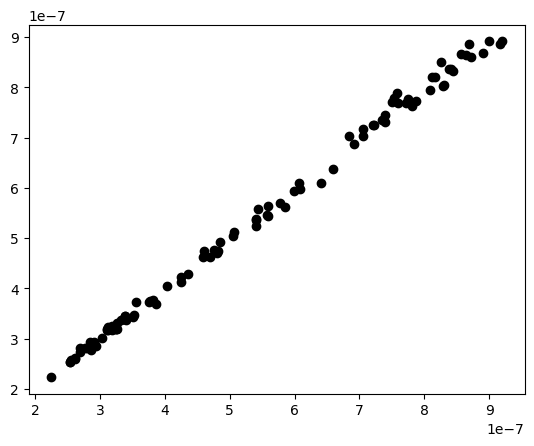

In [68]:
micro_df['L_squared'] = micro_df['L']**2
micro_df['cos(phi)'] = np.cos(micro_df['phi'])
micro_df['2eta'] = 2*micro_df['eta']
micro_df['1/gamma'] = 1/micro_df['gamma']
micro_df['1/t'] = 1/micro_df['t']
micro_df['1/cos(phi)'] = 1/micro_df['cos(phi)']

micro_df['washer_model'] = micro_df['L_squared'] * micro_df['2eta']*micro_df['1/gamma']*micro_df['1/t']*micro_df['1/cos(phi)']


X = micro_df[['washer_model']]
y = micro_df['r']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_pred, y_test, color='black')

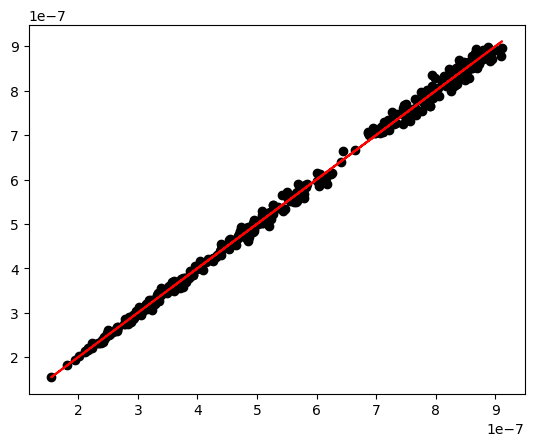

In [69]:
plt.scatter(X_train, y_train, color='black')
plt.plot(X_train, model.predict(X_train), color='red')

In [70]:
big_df['L_squared'] = big_df['L']**2
big_df['cos(phi)'] = np.cos(big_df['phi'])
big_df['2eta'] = 2*big_df['eta']
big_df['1/gamma'] = 1/big_df['gamma']
big_df['1/t'] = 1/big_df['t']
big_df['1/cos(phi)'] = 1/big_df['cos(phi)']

big_df['washer_model'] = big_df['L_squared'] * big_df['2eta']*big_df['1/gamma']*big_df['1/t']*big_df['1/cos(phi)']

big_df['r'] = model.predict(big_df[['washer_model']])

big_df

,gamma,phi,eta,L,t,biscuit,L_squared,cos(phi),2eta,1/gamma,1/t,1/cos(phi),washer_model,r
0,0.073897,1.333006,0.000999,0.011196,19.362214,Digestive,0.000125,0.235556,0.001997,13.532400,0.051647,4.245272,7.429094e-07,7.427543e-07
1,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive,0.000035,0.093900,0.002024,12.353885,0.084370,10.649644,7.803690e-07,7.801733e-07
2,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive,0.000086,0.093518,0.001967,11.440614,0.040333,10.693131,8.302559e-07,8.300062e-07
3,0.070793,1.502001,0.001002,0.003774,16.292780,Hobnob,0.000014,0.068741,0.002003,14.125696,0.061377,14.547441,3.598074e-07,3.600674e-07
4,0.058917,1.548274,0.001004,0.002291,13.662271,Hobnob,0.000005,0.022520,0.002009,16.972899,0.073194,44.404298,5.814437e-07,5.814635e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.084596,1.557367,0.000981,0.003221,24.231107,Digestive,0.000010,0.013429,0.001963,11.820941,0.041269,74.466315,7.396247e-07,7.394732e-07
2996,0.067928,1.487239,0.000993,0.003933,12.256570,Hobnob,0.000015,0.083460,0.001987,14.721444,0.081589,11.981792,4.421999e-07,4.423706e-07
2997,0.059526,1.444489,0.000998,0.007583,26.464108,Hobnob,0.000057,0.125971,0.001995,16.799270,0.037787,7.938319,5.781880e-07,5.782114e-07
2998,0.071386,1.212213,0.001004,0.013988,22.772293,Digestive,0.000196,0.350948,0.002007,14.008343,0.043913,2.849426,6.883535e-07,6.882575e-07


In [71]:
big_df[big_df['t'] > 29.9]

,gamma,phi,eta,L,t,biscuit,L_squared,cos(phi),2eta,1/gamma,1/t,1/cos(phi),washer_model,r
413,0.061334,1.556481,0.001001,0.001703,29.973346,Rich Tea,0.000003,0.014315,0.002002,16.304052,0.033363,69.855292,2.205148e-07,2.209256e-07
573,0.075962,1.416673,0.001012,0.012001,29.915483,Digestive,0.000144,0.153514,0.002024,13.164559,0.033428,6.514084,8.356784e-07,8.354228e-07
1155,0.079376,1.496820,0.001008,0.004897,29.905887,Rich Tea,0.000024,0.073909,0.002015,12.598327,0.033438,13.530173,2.755199e-07,2.758712e-07
1419,0.069254,1.217198,0.000984,0.016970,29.987642,Digestive,0.000288,0.346275,0.001968,14.439608,0.033347,2.887876,7.879003e-07,7.876964e-07
1524,0.072051,1.496667,0.000998,0.006372,29.922937,Hobnob,0.000041,0.074062,0.001996,13.879016,0.033419,13.502282,5.074656e-07,5.075656e-07
1637,0.091558,1.340194,0.000997,0.015198,29.934807,Digestive,0.000231,0.228564,0.001994,10.921991,0.033406,4.375142,7.352676e-07,7.351208e-07
1642,0.089676,1.504196,0.001004,0.005612,29.991969,Rich Tea,0.000031,0.066551,0.002007,11.151284,0.033342,15.026104,3.532040e-07,3.534711e-07
2272,0.070124,1.547004,0.001000,0.004558,29.918149,Digestive,0.000021,0.023790,0.002000,14.260474,0.033425,42.034319,8.321143e-07,8.318625e-07
2353,0.069490,1.507055,0.000989,0.006879,29.922843,Digestive,0.000047,0.063698,0.001978,14.390592,0.033419,15.699012,7.066320e-07,7.065162e-07
2393,0.074408,1.444589,0.000999,0.006653,29.924227,Rich Tea,0.000044,0.125872,0.001998,13.439329,0.033418,7.944560,3.155023e-07,3.158102e-07


In [72]:
mean_pores = big_df.groupby('biscuit')['r'].mean()
mean_pores

biscuit
Digestive    8.019068e-07
Hobnob       5.004151e-07
Rich Tea     3.023810e-07
Name: r, dtype: float64

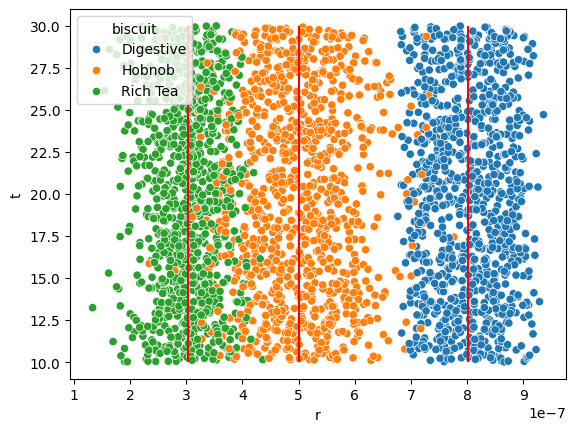

In [73]:
sns.scatterplot(data=big_df, x="r", y="t", hue="biscuit")
plt.vlines(x=mean_pores['Digestive'], ymin=big_df['t'].min(), ymax=big_df['t'].max(), color='red', label='Digestive mean pore size')
plt.vlines(x=mean_pores['Hobnob'], ymin=big_df['t'].min(), ymax=big_df['t'].max(), color='red', label='Hobnob mean pore size')
plt.vlines(x=mean_pores['Rich Tea'], ymin=big_df['t'].min(), ymax=big_df['t'].max(), color='red', label='Rich Tea mean pore size')

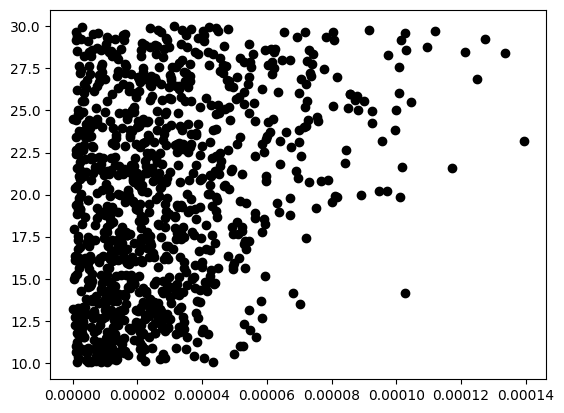

In [74]:
hob_df = big_df[big_df['biscuit'] == 'Rich Tea']

plt.scatter(hob_df['L_squared'], hob_df['t'], color='black')

In [75]:
tr1_df = pd.read_csv('tr-1.csv')

tr1_df['gamma'] = 0.0678
tr1_df['eta'] = 0.000993
tr1_df['phi'] = 1.45

tr1_df['L_squared'] = tr1_df['L']**2
tr1_df['cos(phi)'] = np.cos(tr1_df['phi'])
tr1_df['2eta'] = 2*tr1_df['eta']
tr1_df['1/gamma'] = 1/tr1_df['gamma']
tr1_df['1/t'] = 1/tr1_df['t']
tr1_df['1/cos(phi)'] = 1/tr1_df['cos(phi)']

tr1_df['washer_model'] = tr1_df['L_squared'] * tr1_df['2eta']*tr1_df['1/gamma']*tr1_df['1/t']*tr1_df['1/cos(phi)']

tr1_df['r'] = model.predict(tr1_df[['washer_model']])

tr1_df

,t,L,dL,gamma,eta,phi,L_squared,cos(phi),2eta,1/gamma,1/t,1/cos(phi),washer_model,r
0,30.000000,0.008087,0.000392,0.0678,0.000993,1.45,0.000065,0.120503,0.001986,14.749263,0.033333,8.298564,5.299585e-07,5.300341e-07
1,32.727273,0.008253,0.000270,0.0678,0.000993,1.45,0.000068,0.120503,0.001986,14.749263,0.030556,8.298564,5.059083e-07,5.060099e-07
2,35.454545,0.008607,0.000501,0.0678,0.000993,1.45,0.000074,0.120503,0.001986,14.749263,0.028205,8.298564,5.079106e-07,5.080101e-07
3,38.181818,0.008920,0.000267,0.0678,0.000993,1.45,0.000080,0.120503,0.001986,14.749263,0.026190,8.298564,5.066000e-07,5.067009e-07
4,40.909091,0.009604,0.000274,0.0678,0.000993,1.45,0.000092,0.120503,0.001986,14.749263,0.024444,8.298564,5.480791e-07,5.481351e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,289.090909,0.024948,0.000307,0.0678,0.000993,1.45,0.000622,0.120503,0.001986,14.749263,0.003459,8.298564,5.233479e-07,5.234307e-07
96,291.818182,0.025015,0.000711,0.0678,0.000993,1.45,0.000626,0.120503,0.001986,14.749263,0.003427,8.298564,5.212458e-07,5.213308e-07
97,294.545455,0.024558,0.000322,0.0678,0.000993,1.45,0.000603,0.120503,0.001986,14.749263,0.003395,8.298564,4.977054e-07,4.978160e-07
98,297.272727,0.025243,0.000489,0.0678,0.000993,1.45,0.000637,0.120503,0.001986,14.749263,0.003364,8.298564,5.210313e-07,5.211166e-07


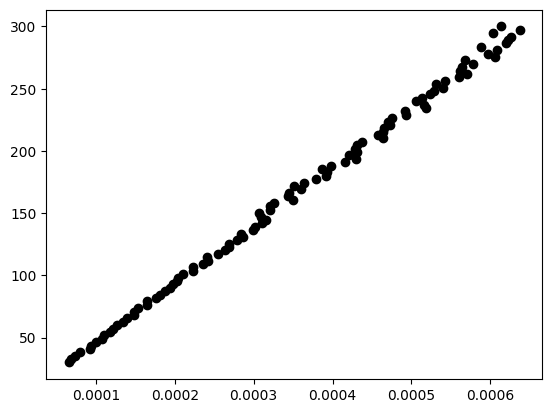

In [76]:
plt.scatter(tr1_df['L_squared'], tr1_df['t'], color='black')

This fits the washer equation